In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
headers = ['episode_num', 'success', 'total_reward', 'total_steps', 'exploration_steps', 'epsilon']
dtypes = {'episode_num': 'int', 'success': 'str', 'total_reward': 'int', 'total_steps': 'int', 'explorations': 'int', 'epsilon': float}

In [4]:
data = pd.read_csv('qtables/episodes.txt', header=None, names=headers, dtype=dtypes)

In [5]:
data['success_bool'] = True
data['success_int'] = 0

In [6]:
for i, v in enumerate(data['success'].values):
    if v.strip() == 'False':
        data.set_value(i, 'success_bool', False)
        data.set_value(i, 'success_int', 0)
    else:
        data.set_value(i, 'success_bool', True)
        data.set_value(i, 'success_int', 1)

In [7]:
data.tail()

,episode_num,success,total_reward,total_steps,exploration_steps,epsilon,success_bool,success_int
2498,2499,False,-11,2,1,0.22503,False,0
2499,2500,False,-7,4,1,0.22500,False,0
2500,2501,False,-6,3,1,0.22497,False,0
2501,2502,False,-6,3,1,0.22494,False,0
2502,2503,True,12,5,0,0.22491,True,1


In [8]:
episode_success = data.iloc[:, [0, 6]].values
episode_reward = data.iloc[:, [0, 2]].values
episode_steps = data.iloc[:, [0, 3]].values
episode_explorations = data.iloc[:, [0, 4]].values

In [9]:
episode_success[:, 1]

array([False, False, False, ..., False, False, True], dtype=object)

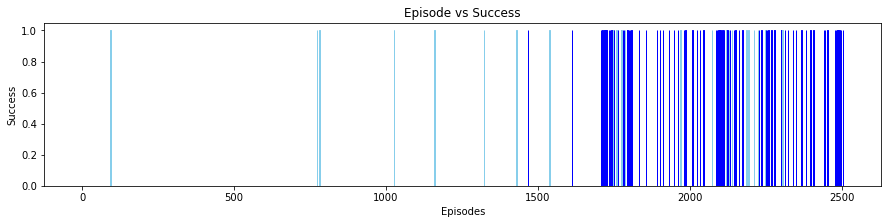

In [16]:
# Success
plt.figure(figsize=(15, 3))

b = plt.bar(episode_success[:, 0], episode_success[:, 1], width=1)
for i in range(len(episode_success)):
    if episode_explorations[i][1] == 0 and episode_success[i][1]:
        b[i].set_color('blue')
        b[i].set_linewidth(1)
    else:
        b[i].set_color('skyblue')
        
plt.xlabel('Episodes')
plt.ylabel('Success')
plt.title('Episode vs Success')
plt.show()

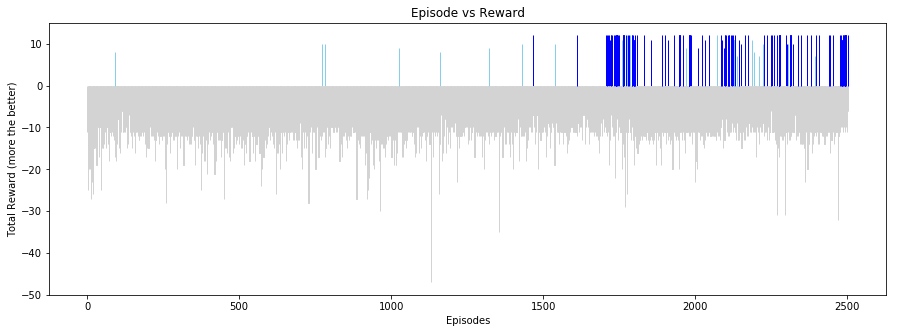

In [17]:
# Reward
plt.figure(figsize=(15, 5))
b = plt.bar(episode_reward[:, 0], episode_reward[:, 1], width=0.2)
for i in range(len(episode_reward)):
    if episode_success[i][1] and episode_explorations[i][1] == 0:
        b[i].set_color('b')
        b[i].set_linewidth(1)
    elif episode_success[i][1] and episode_explorations[i][1] > 0:
        b[i].set_color('skyblue')
        b[i].set_linewidth(1)
    else:
        b[i].set_color('lightgray')
        
plt.xlabel('Episodes')
plt.ylabel('Total Reward (more the better)')
plt.title('Episode vs Reward')
plt.show()

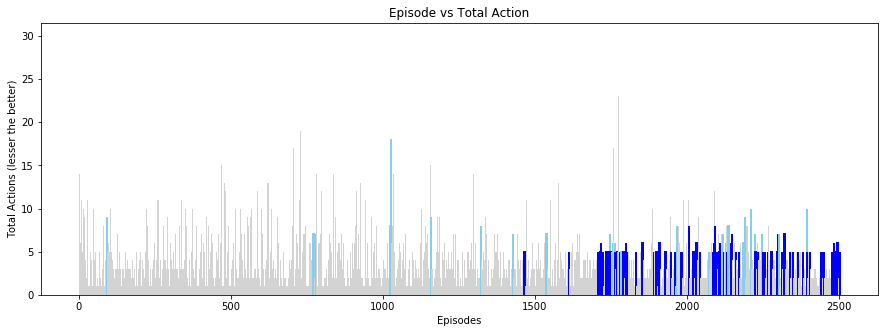

In [19]:
# Exploration vs Exploitation
plt.figure(figsize=(15, 5))
b = plt.bar(episode_steps[:, 0], episode_steps[:, 1], width=1, color=['lightgray'])

for i in range(len(episode_steps)):
    if episode_success[i][1] and episode_explorations[i][1] == 0:
        b[i].set_color('b')
        b[i].set_linewidth(2)
    elif episode_success[i][1] and episode_explorations[i][1] > 0:
        b[i].set_color('skyblue')
        b[i].set_linewidth(2)
    #else:
     #   b[i].set_color('lightgray')

plt.xlabel('Episodes')
plt.ylabel('Total Actions (lesser the better)')
plt.title('Episode vs Total Action')        
plt.show()